In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import funciones_estadistica as estadistica
import pymysql
from sqlalchemy import inspect
from sqlalchemy import create_engine, text
import ast  # Para convertir texto en listas de Python

ModuleNotFoundError: No module named 'funciones_estadistica'

In [4]:
pip install word2number

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'word2number' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'word2number'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=b84daa32c04f0348617d2c3bc050c5adbc4dce99326fff0f1b682899d9812bf6
  Stored in directory: /Users/lucianayelicich/Library/Caches/pip/wheels/5b/79/fb/d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from word2number import w2n

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
import funciones_limpieza as limp
import funciones_visualizacion as visual

In [13]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [14]:
df = pd.read_csv("optimizacion_talento.csv", index_col= 0)


In [15]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,No Travel,Research & Development,6,3,Other,1,1,Female,3,5,Research Director,3,Unknown,7,No,3,3,0,5,3,20,15,15,1972,195370.00,Sí
1,52,No,No Travel,Sales,1,4,Life Sciences,2,3,Female,2,5,Manager,3,Unknown,0,Unknown,3,1,1,5,3,33,11,9,1971,199990.00,Sí
2,42,No,Travel Rarely,Sales,4,2,Technical Degree,3,3,Female,3,5,Manager,4,Married,1,No,3,4,0,3,3,22,11,15,1981,192320.00,Sí
3,47,No,Travel Rarely,Research & Development,2,4,Medical,4,1,Male,3,4,Research Director,3,Married,3,Unknown,3,2,2,2,3,20,5,6,1976,171690.00,No
4,46,No,No Travel,Sales,3,3,Technical Degree,5,1,Male,4,4,Sales Executive,1,Divorced,2,No,3,4,1,5,3,19,2,8,1977,153407.04,No


In [16]:
print(df.shape)

(1614, 28)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1614 non-null   int64  
 1   attrition                 1614 non-null   object 
 2   businesstravel            1614 non-null   object 
 3   department                1614 non-null   object 
 4   distancefromhome          1614 non-null   int64  
 5   education                 1614 non-null   int64  
 6   educationfield            1614 non-null   object 
 7   employeenumber            1614 non-null   int64  
 8   environmentsatisfaction   1614 non-null   int64  
 9   gender                    1614 non-null   object 
 10  jobinvolvement            1614 non-null   int64  
 11  joblevel                  1614 non-null   int64  
 12  jobrole                   1614 non-null   object 
 13  jobsatisfaction           1614 non-null   int64  
 14  maritalstatus

Obtenemos la matriz de correlación para poder ver las relaciones entre las variables

In [17]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

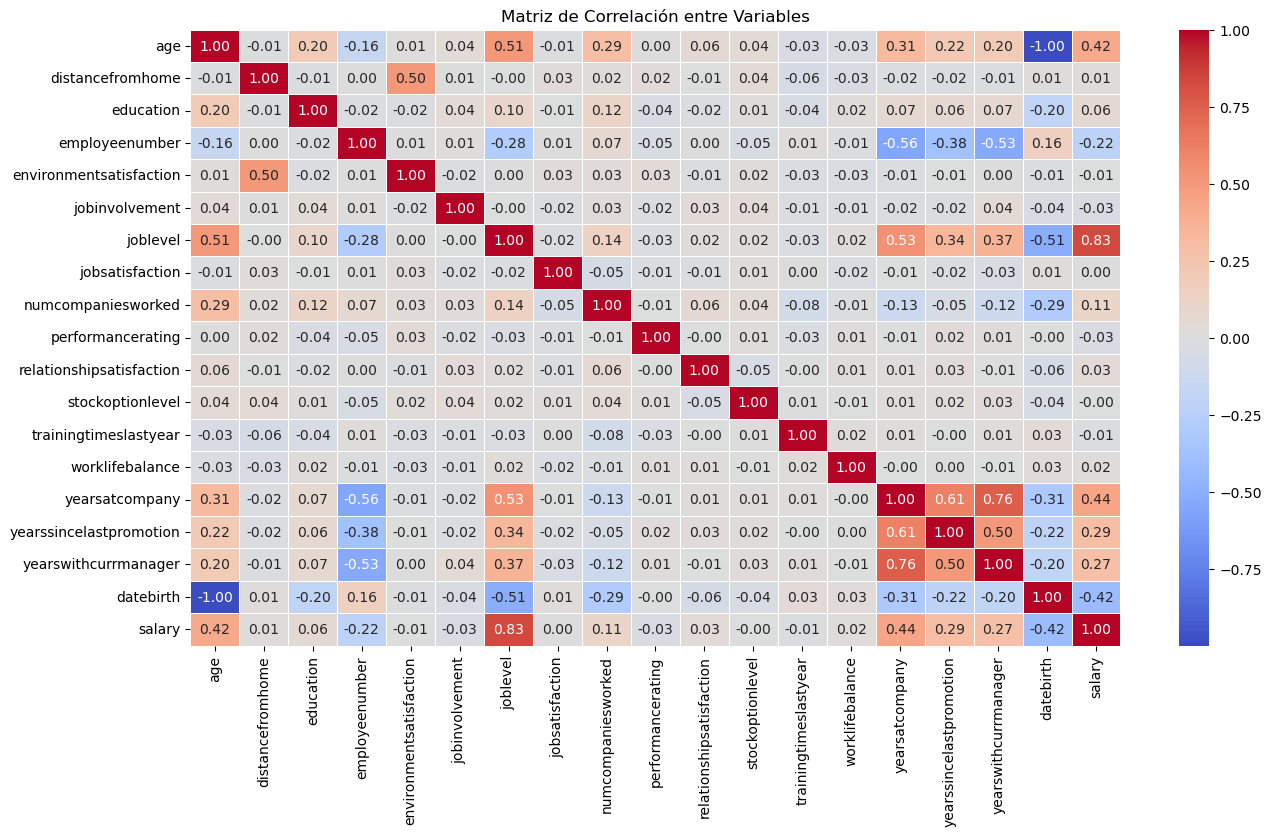

In [18]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [19]:
palettes = sns.color_palette("coolwarm", 2)
palettes4 = sns.color_palette("coolwarm", 4)

In [20]:
media_edad_salidas = df["attrition"]=="yes"
media_edad_salidas = df[media_edad_salidas]
media_edad_salidas

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework


In [21]:
media_edad_salidas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distancefromhome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employeenumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environmentsatisfaction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jobinvolvement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
joblevel,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jobsatisfaction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcompaniesworked,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
performancerating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


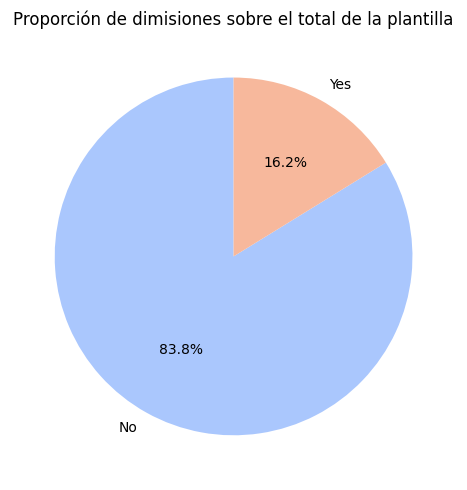

In [ ]:
estadistica.grafico_pastel(df, 'attrition', 'Proporción de dimisiones sobre el total de la plantilla')

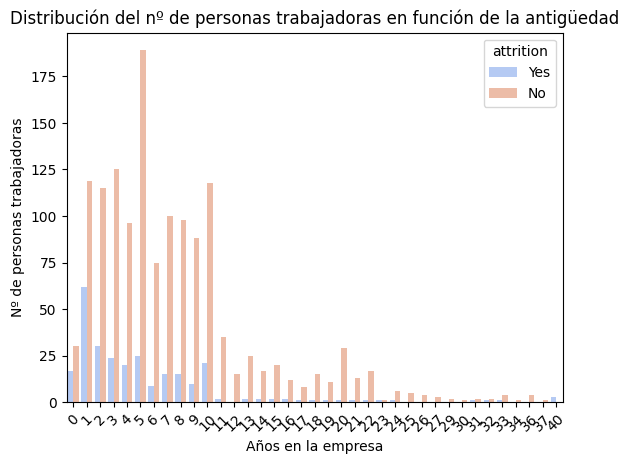

In [ ]:
sns.countplot(x='yearsatcompany', data=df, palette = palettes , hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Años en la empresa")
plt.ylabel("Nº de personas trabajadoras")
plt.title('Distribución del nº de personas trabajadoras en función de la antigüedad')
plt.show()

In [ ]:
grupo_veterania = df.groupby(['yearsatcompany', 'attrition'])['employeenumber'].count().reset_index()
grupo_veterania = grupo_veterania.rename(columns={'employeenumber': 'total'})
grupo_veterania

,yearsatcompany,attrition,total
0,0,No,30
1,0,Yes,17
2,1,No,119
3,1,Yes,62
4,2,No,115
...,...,...,...
59,33,Yes,1
60,34,No,1
61,36,No,4
62,37,No,1


In [ ]:
def clasificar_veterania(df, col='yearsatcompany'):
    df['veterania'] = df[col].apply(lambda x: '+ de 10 años' if x > 10 else '-= de 10 años')
    return df

In [ ]:
clasificar_veterania(df)

,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework,veterania
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes,+ de 10 años
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1,+ de 10 años
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1,+ de 10 años
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False,+ de 10 años
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0,+ de 10 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,"3,0",4,NaN,0,NaN,2,"3,0",3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes,-= de 10 años
1674,1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,"3,0",3,Full Time,1,"27,0",2,"3,0",5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False,-= de 10 años
1675,1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,"3,0",1,Part Time,0,"6,0",1,"3,0",6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False,-= de 10 años
1676,1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes,+ de 10 años


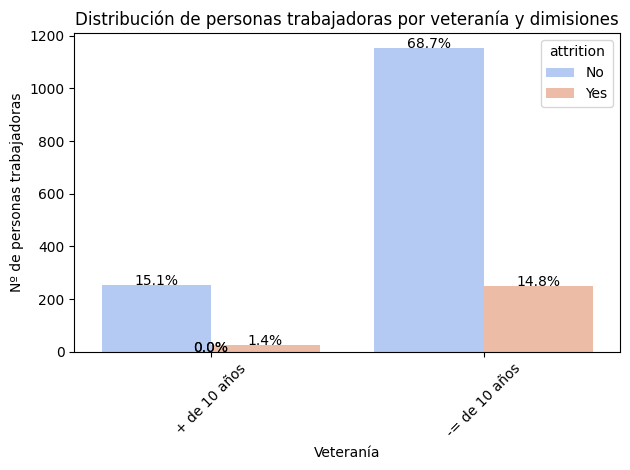

In [ ]:
grafico = sns.countplot(x='veterania', data= df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Veteranía")
plt.ylabel("Nº de personas trabajadoras")

total = len(df)
for p in grafico.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    grafico.text(
        p.get_x() + p.get_width() / 2, 
        height + 1,  # Ajuste para que no tape la barra
        percentage, 
        ha='center'
    )

plt.title("Distribución de personas trabajadoras por veteranía y dimisiones")
plt.tight_layout()
plt.show()

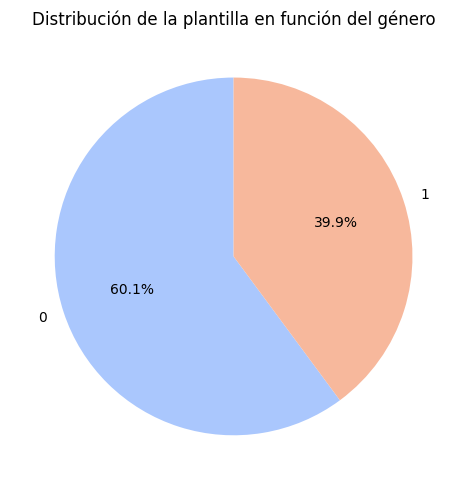

In [ ]:
estadistica.grafico_pastel(df, 'gender', 'Distribución de la plantilla en función del género')

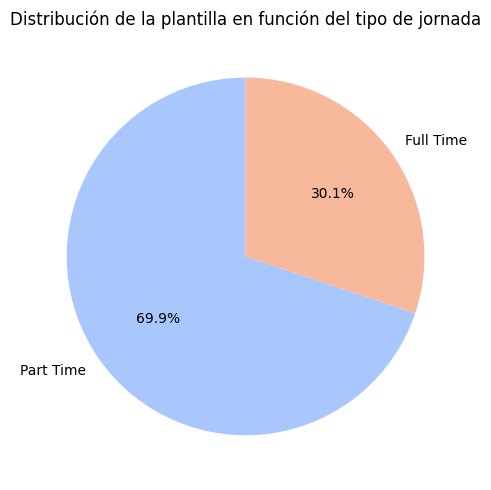

In [ ]:
estadistica.grafico_pastel(df, 'standardhours', 'Distribución de la plantilla en función del tipo de jornada')

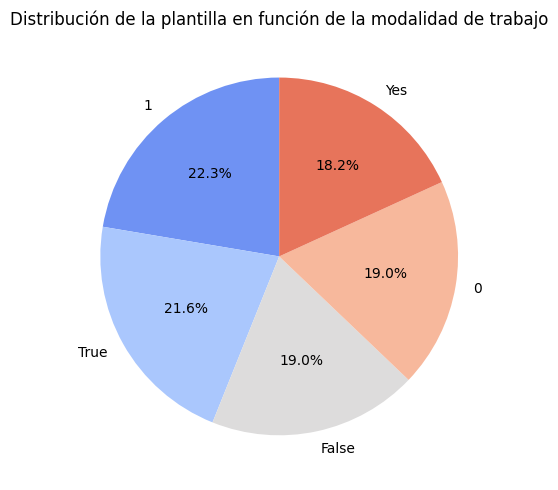

In [ ]:
estadistica.grafico_pastel(df, 'remotework', 'Distribución de la plantilla en función de la modalidad de trabajo')

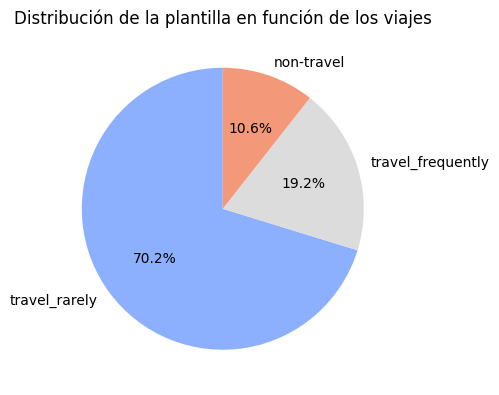

In [ ]:
estadistica.grafico_pastel(df, 'businesstravel', 'Distribución de la plantilla en función de los viajes')

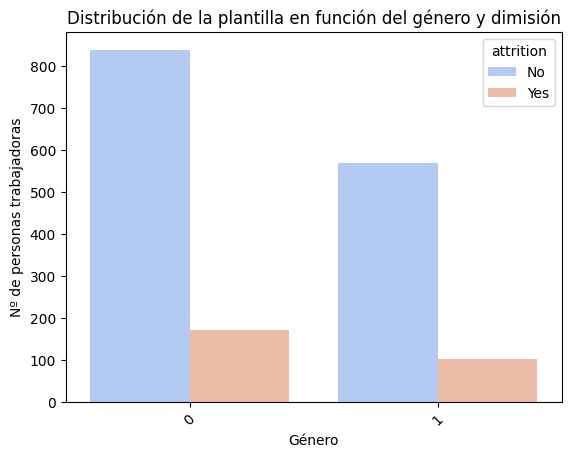

In [ ]:
sns.countplot(x='gender', data=df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Género")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del género y dimisión")

plt.show()

In [ ]:
df_ylp_s = df.groupby("jobsatisfaction").agg({
    "employeenumber": "nunique",
    "yearssincelastpromotion": "mean"}).reset_index()
df_ylp_s

,jobsatisfaction,employeenumber,yearssincelastpromotion
0,1,317,2.389571
1,2,302,2.321767
2,3,481,2.100604
3,4,514,2.236059
